In [8]:
import  numpy as np 
import pandas as pd
import seaborn  as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
from warnings import filterwarnings
from tensorflow.keras.models import load_model


In [2]:

train_data=image_dataset_from_directory(r"C:\Users\KINGNICKS-DELL\Downloads\emotion\emotion_data",image_size=(150, 150),seed=123,subset="training",validation_split=0.2)

Found 15301 files belonging to 5 classes.
Using 12241 files for training.


In [3]:
val_data=image_dataset_from_directory(r"C:\Users\KINGNICKS-DELL\Downloads\emotion\emotion_data",image_size=(150,150),seed=123,subset="validation",validation_split=0.2,)

Found 15301 files belonging to 5 classes.
Using 3060 files for validation.


In [4]:
train_data.element_spec

(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [18]:
class_name=['Angery','Happy','Neutral','Sad','Surprise']

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,RandomFlip,RandomRotation,RandomZoom,MaxPooling2D,Rescaling

In [18]:
model=Sequential()
model.add(Rescaling(scale=1./255,input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(8,activation="softmax"))

In [19]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=["accuracy"])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
model.fit(train_data,epochs=5,validation_data=val_data)

Epoch 1/5
383/383 ━━━━━━━━━━━━━━━━━━━━ 239s 624ms/step - accuracy: 0.9074 - loss: 0.2748 - val_accuracy: 0.6542 - val_loss: 1.2801
Epoch 2/5
383/383 ━━━━━━━━━━━━━━━━━━━━ 292s 762ms/step - accuracy: 0.9451 - loss: 0.1796 - val_accuracy: 0.6608 - val_loss: 1.3574
Epoch 3/5
383/383 ━━━━━━━━━━━━━━━━━━━━ 281s 732ms/step - accuracy: 0.9540 - loss: 0.1431 - val_accuracy: 0.6585 - val_loss: 1.5799
Epoch 4/5
383/383 ━━━━━━━━━━━━━━━━━━━━ 259s 676ms/step - accuracy: 0.9604 - loss: 0.1138 - val_accuracy: 0.6618 - val_loss: 1.6591
Epoch 5/5
383/383 ━━━━━━━━━━━━━━━━━━━━ 247s 645ms/step - accuracy: 0.9730 - loss: 0.0825 - val_accuracy: 0.6507 - val_loss: 1.8364


In [22]:
model.evaluate(val_data)

96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.6431 - loss: 1.8858


[1.8364145755767822, 0.650653600692749]

In [9]:
from tensorflow.keras.preprocessing.image import load_img

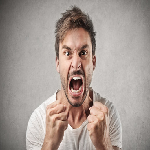

In [21]:
image=load_img(r"C:\Users\KINGNICKS-DELL\Downloads\360_F_56935312_NiqxkRKOdGSJd86Tc2uLycL9fkUsIlRW.jpg",target_size=(150,150))
image

In [41]:
type(image)

PIL.Image.Image

In [22]:
Image=np.array(image)

In [23]:
Image_fin=Image/255
Image_fin=np.expand_dims(Image,axis=0)
Image_fin.shape

(1, 150, 150, 3)

In [24]:
Model=load_model(r"C:\Users\KINGNICKS-DELL\Downloads\emotion\Emotion_Model.keras")

In [25]:
pred=Model.predict(Image_fin)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


array([[8.1986345e-06, 5.8074582e-15, 6.1166168e-12, 9.9999154e-01,
        3.0086926e-07, 1.2821657e-21, 2.9889356e-21, 3.2879706e-19]],
      dtype=float32)

In [26]:
np.argmax(pred)

3

In [27]:
class_name[np.argmax(pred)]

'Sad'

In [60]:
model.save("Emotion_Model.keras")

In [4]:
1500*8

12000